# BreastCancer Diagnostic with Perceptron

In [11]:
import pandas as pd # for loading data csv into dataframe and cleaning data
import os # for building url path
import numpy as np 
import matplotlib.colors # will use ListedColorMap to plot results
import matplotlib.pyplot as pp

## Read in cancer data from the machine learning database

In [12]:
cancer_data_url = os.path.join ('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'breast-cancer-wisconsin', 'breast-cancer-wisconsin.data')
cancer_data = pd.read_csv(cancer_data_url, header=None, encoding='utf-8')
cancer_data.columns = ['id', 'thickness', 'size uniformity', # assign columns more useful names
                       'shape uniformity', 'marginal adhesion',
                       'epi cell size', 'bare nuclei', 'bland chromatin',
                       'normal nucleoi', 'mitoses', 'class']
cancer_data

,id,thickness,size uniformity,shape uniformity,marginal adhesion,epi cell size,bare nuclei,bland chromatin,normal nucleoi,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


## Helper method to plot the correlation between three features

In [13]:
def plot_classes_by_columns(super_plot, frame, c1, c2, c3, num=2, denom=3):
    malignants = frame.loc[frame['class'] == 4]
    benigns = frame.loc[frame['class'] == 2]
    
    num_maligns = int((len(malignants.index) / denom) * num)
    num_benigns = int((len(benigns.index) / denom) * num)
    
    super_plot.scatter(malignants[c1].values[:num_maligns], malignants[c2].values[:num_maligns], malignants[c3].values[:num_maligns],color='red', marker='o', label='malignant')
    super_plot.scatter(benigns[c1].values[:num_benigns], benigns[c2].values[:num_benigns], benigns[c3].values[:num_benigns], color='blue', marker='x', label='benign')

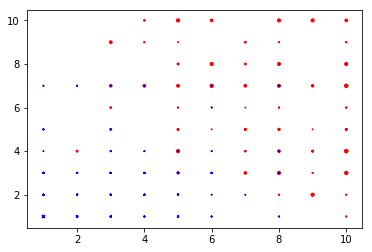

In [14]:
plot_classes_by_columns(pp, cancer_data, 'thickness', 'bland chromatin', 'mitoses', num=1, denom=1)

## Helper Fn to return a list of every unique grouping of three values in a given list

In [15]:
def every_unique_triplet(mylist):
    """returns every positionally unique triplet in a given list: assumes that no elements in the list appear more than once"""
    
    ret_list = []
    list_copy = mylist[1:].copy()
    list_copy_copy = list_copy[1:].copy()
    
    for i in mylist:
        for j in list_copy:
            for k in list_copy_copy:
                if j != k:
                    ret_list.append([i,j, k])
            list_copy_copy = list_copy[1:]
        list_copy = list_copy[1:]
   
    return ret_list

## Perceptron Class
### As Implemented in Ch02

In [16]:
class perceptron(object):
    """perceptron linear classifier"""
    
    # I added the keyword parameter threshold to allow the user to specify the threshold
    def __init__(self, learning_rate=0.1, epochs=50, random_seed=1, threshold=0.0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.random_seed = random_seed
        self.threshold = threshold
    
    def fit (self, X, y):
        unnormalized_weights = np.random.RandomState(self.random_seed)
        self.weights = unnormalized_weights.normal(loc=0.0, scale=0.1, size= 1 + X.shape[1]) # initialize weights to small random numbers
    
        self.errors_ = [] # Will keep track of the number of missclassifications
    
        for _ in range(self.epochs): #iterate over the data set epochs times
            errors = 0
            for xi, target in zip(X, y):
                delta_weights = self.learning_rate * (target - self.predict(xi)) # compare the predicted value to the desired, and determine change in weights
                self.weights[1:] += delta_weights * xi # all weights by delta_weights
                self.weights[0] += delta_weights # update bias unit
                errors += int(delta_weights != 0.0) # add 1 to the number of errors if the weight changed: otherwise add 0
            self.errors_.append(errors) # append number of errors to errors list so we can plot convergence later
        return self
    
    def net_input (self, X):
        """calculate net input"""
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def predict (self, X):
        return np.where(self.net_input(X) >= self.threshold, 1, -1)

## Fns to determine accuracy and missclassifications

In [17]:
def accuracy_and_misclasses(prediction, labels):
    """Fn to determine accuracy"""
    missclassifications = 0
    correct_predictions = len(labels)
    for a,b in zip(prediction, labels):
        if a != b:
            missclassifications += 1
            correct_predictions -= 1
    return (correct_predictions / len(labels), missclassifications)

## Fn to run create and test a perceptron with the given parameters

In [18]:
def split_fit_test(c1, c2, c3, testtrain_ratio, dataframe=cancer_data, verbose=False, learning_rate=0.1, epochs=50, threshold=0):
    """split data from feature columns c1 and c2 into train and test sets at tt_ratio proportions and fit/test a perceptron"""
    
    # get the integer indeces corresponding to the column names passed to split_fit_test
    c1_idx = dataframe.columns.get_loc(c1)
    c2_idx = dataframe.columns.get_loc(c2)
    c3_idx = dataframe.columns.get_loc(c2)
    
    # number of rows of dataframe which will belong to the training set (we know the number in the test set from this implicitly)
    num_train = len(dataframe.index) - int(len(dataframe.index) * testtrain_ratio)
    
    # Training set
    y_train = cancer_data.iloc[:num_train,10].values # the array of target values: 2 for benign, 4 for malignant
    y_train = np.where(y_train == 2, -1, 1) # change class labels 2 and 4 to -1 and 1 respectively
    X_train = cancer_data.iloc[:num_train, [c1_idx,c2_idx,c3_idx]].values
    
    # feature scaling to standardize the distribution of values in our training set
    X_train_std = np.copy(X_train)
    X_train_std[:, 0] = (X_train[:, 0] - X_train[:, 0].mean()) / X_train[:, 0].std()
    X_train_std[:, 1] = (X_train[:, 1] - X_train[:, 1].mean()) / X_train[:, 1].std()
    X_train_std[:, 2] = (X_train[:, 2] - X_train[:, 2].mean()) / X_train[:, 2].std()
    
    # Testing set
    y_test = cancer_data.iloc[num_train:,10].values # analagous to above
    y_test = np.where(y_test == 2, -1, 1)
    X_test = cancer_data.iloc[num_train:, [c1_idx, c2_idx, c3_idx]].values
    X_test_std = np.copy(X_train)
    X_test_std[:, 0] = (X_train[:, 0] - X_train[:, 0].mean()) / X_train[:, 0].std()
    X_test_std[:, 1] = (X_train[:, 1] - X_train[:, 1].mean()) / X_train[:, 1].std()
    X_test_std[:, 2] = (X_train[:, 2] - X_train[:, 2].mean()) / X_train[:, 2].std()
    
    tron = perceptron(learning_rate=learning_rate, epochs=epochs, threshold=threshold)
    tron.fit(X_train_std, y_train)

    prediction = tron.predict(X_test_std)
    accuracy,misclasses = accuracy_and_misclasses(prediction, y_test)
    if verbose:
        print("For features", c1, ",", c2, "and", c3, ", and test/train ratio", testtrain_ratio, "the perceptron had", misclasses, "missclassifications and had an accuracy of", accuracy, "\n")
    return (accuracy, misclasses)
    

## Maximizing Accuracy

Using the classes and functions we've created so far, we can now actually utilize and test the perceptron concept on the data-set we loaded in. 

### First pass: maximize accuracy by feature sets

First, we want to pick the ideal feature set (i.e. the one which yields the most accuracy in our predictions

In [19]:
best_accuracy = 0
best_set = None
misses = 0
for c1,c2,c3 in every_unique_triplet(cancer_data.columns[1:10]):
    if c1 != 'bare nuclei' and c2 != 'bare nuclei' and c3 != 'bare nuclei': # bare nuclei contains a null value
        acc,miss = split_fit_test(c1, c2, c3, 0.3)
        if acc > best_accuracy:
            best_accuracy = acc
            best_set = (c1, c2, c3)
            misses = miss
            
final_c1, final_c2, final_c3 = best_set
print("The highest accuracy was", best_accuracy, "for the feature set", final_c1, ",", final_c2, "and", final_c3, "with", misses, "missclassifications.")

The highest accuracy was 0.3444976076555024 for the feature set thickness , bland chromatin and shape uniformity with 137 missclassifications.


Based on the results of this loop, we choose the feature set {thickness, bland chromatin, shape uniformity}
Even this best set is not great: only about 35.5% accuracy. Of course, that's why we have three more optimization passes!

### Second pass: maximize accuracy by test/train set proportions

Next we try to maximize the accuracy by the way we split out training and test sets. Notice we carry over our feature set which we chose the previous pass.

In [20]:
best_accuracy = 0
misses = 0
best_prop = 0
 
for prop in [0.25, 0.3, 0.35, 0.40, 0.45]:
    acc,miss = split_fit_test('thickness', 'bland chromatin', 'shape uniformity', prop)
    if acc > best_accuracy:
        best_accuracy = acc
        misses = miss
        best_prop = prop
        
        
print("The highest accuracy was", best_accuracy, "for test/train proportion", best_prop, "with", misses, "missclassifications.")

The highest accuracy was 0.6091954022988506 for test/train proportion 0.25 with 68 missclassifications.


We got the highest accuracy with the test/train proportion of 1:3. We're already getting more accurate!

## Third pass: maximize accuracy by learning rate

Once again, we carry over the ideal parameters that we determined last pass

In [21]:
best_accuracy = 0
misses = 0
best_rate = 0

for rate in [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4]:
    acc,miss = split_fit_test('thickness', 'bland chromatin', 'shape uniformity', 0.25, learning_rate=rate)
    if acc > best_accuracy:
        best_accuracy = acc
        misses = miss
        best_rate = rate

print("The highest accuracy was", best_accuracy, "for learning rate", best_rate, "with", misses, "missclassifications.")

The highest accuracy was 0.6149425287356322 for learning rate 0.0001 with 67 missclassifications.


It may not be much, but it is an improvement! Our ideal learning rate is now 0.0001

### Fourth pass: Maximize accuracy by number of epochs

In [22]:
best_accuracy = 0
misses = 0
best_num_epochs = 0

for n in [10, 20, 30, 40, 50, 75, 100]:
    acc,miss = split_fit_test('thickness', 'bland chromatin', 'shape uniformity', 0.25, learning_rate=0.0001, epochs=n)
    if acc > best_accuracy:
        best_accuracy = acc
        misses = miss
        best_num_epochs = n

print("The highest accuracy was", best_accuracy, "for", best_num_epochs, "epochs with", misses, "missclassifications.")

The highest accuracy was 0.6149425287356322 for 20 epochs with 67 missclassifications.


No improvement in accuracy here, but we do know that we can get the same accuracy at 20 epochs as we do at the default of 50! We can be more efficient by only doing the 20 epochs it takes to consistently converge on a somewhat-ideal linear seperation.

### Fifth Pass: Maximize by threshold

In [75]:
best_accuracy = 0
misses = 0
best_threshold = 0
for theta in [0, 0.1, 0.01, 0.2, 0.5, 1, 2, -1, -2, 3, 4, 6]:
    acc,miss = split_fit_test('thickness', 'bland chromatin', 'shape uniformity', 0.25, epochs=20, learning_rate=0.0001, threshold=theta)
    if acc > best_accuracy:
        best_accuracy = acc
        misses = miss
        best_threshold = theta
        
print("The highest accuracy was", best_accuracy, "for the threshold", best_threshold, "with", misses, "missclassifications.")

The highest accuracy was 0.7816091954022989 for the threshold 3 with 38 missclassifications.
